# Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import joblib

import time
import os

# Import Data

In [2]:

#95_file='/content/v5_20230407_091351_95m.csv'
#310_file='/content/v5_20230408_082538_310m.csv'
#file_206='/content/v5_20230409_090939_206m.csv'
#file_290='/content/v5_20240127_090226_290m.csv'
file_135='/content/v5_20240203_091405_135m.csv'
#file_57='/content/v5_20240204_150730_57m.csv'
#file_166='/content/v5_20240204_094535_166m.csv'
#df_95=pd.read_csv(95_file)
#df_310=pd.read_csv(310_file)
#df_206=pd.read_csv(file_206)
#df_290=pd.read_csv(file_290)
df_135=pd.read_csv(file_135)
#df_57=pd.read_csv(file_57)
#df_166=pd.read_csv(file_166)



In [3]:
df_135

Timestamp  accelX(g)  accelY(g)  accelZ(g)  \
0      03-Feb-2024 09:14:05.046     0.0779    -0.7570    -0.6574   
1      03-Feb-2024 09:14:05.153     0.0470    -0.6839    -0.7246   
2      03-Feb-2024 09:14:05.253     0.0190    -0.6969    -0.6810   
3      03-Feb-2024 09:14:05.353     0.0258    -0.6573    -0.7251   
4      03-Feb-2024 09:14:05.453    -0.0216    -0.6548    -0.7483   
...                         ...        ...        ...        ...   
80965  03-Feb-2024 11:29:17.045     0.0777    -0.4833    -0.8773   
80966  03-Feb-2024 11:29:17.146     0.0749    -0.5092    -0.8155   
80967  03-Feb-2024 11:29:17.246     0.1424    -0.5443    -0.7947   
80968  03-Feb-2024 11:29:17.346     0.1673    -0.5422    -0.8183   
80969  03-Feb-2024 11:29:17.446     0.1678    -0.5598    -0.8492   

       accelUserX(g)  accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  \
0             0.0067         0.0072         0.0429        0.1006   
1             0.0154        -0.0009         0.0178       -0.5543   
2            -0.0026        -0.0161         0.0565       -0.3438   
3             0.0196         0.0128         0.0157       -0.0603   
4            -0.0314         0.0111        -0.0145        0.0052   
...              ...            ...            ...           ...   
80965        -0.0010         0.0092        -0.0082       -0.0317   
80966        -0.0205         0.0029         0.0369        0.1081   
80967         0.0135        -0.0049         0.0134        0.2077   
80968        -0.0075         0.0130        -0.0103        0.2062   
80969         0.0290        -0.0164        -0.0172        0.1464   

       gyroY(rad/s)  gyroZ(rad/s)  ...  ActivityType  ActivityConfidence  \
0            0.1067       -0.0197  ...       Unknown                High   
1           -0.3974        0.0895  ...       Unknown                High   
2           -0.2756       -0.0334  ...       Unknown                High   
3           -0.1010        0.0342  ...       Unknown                High   
4            0.0074        0.0251  ...       Unknown                High   
...             ...           ...  ...           ...                 ...   
80965       -0.0696       -0.0179  ...       Walking                High   
80966        0.0895       -0.0389  ...       Walking                High   
80967        0.2313       -0.0875  ...       Walking                High   
80968        0.3574       -0.0191  ...       Walking                High   
80969        0.1338       -0.0206  ...       Walking                High   

       Pressure(kilopascals)  RelativeAltitude(meters)  magX(µT)  magY(µT)  \
0                    82.6917                   -0.2563  475.8704 -156.4049   
1                    82.6917                   -0.2563  474.1407 -155.4105   
2                    82.6917                   -0.2563  473.1533 -154.4185   
3                    82.6917                   -0.2563  472.7304 -153.8746   
4                    82.6917                   -0.2563  472.5223 -153.8659   
...                      ...                       ...       ...       ...   
80965                86.8679                 -401.9312  441.9981 -123.8541   
80966                86.8679                 -401.9312  442.5202 -124.4393   
80967                86.8679                 -401.9312  444.6817 -126.5147   
80968                86.8679                 -401.9312  446.6817 -127.9236   
80969                86.8679                 -401.9312  447.1331 -128.4061   

       magZ(µT)  calMagX(µT)  calMagY(µT)  calMagZ(µT)  
0     -228.1336       0.0000       0.0000       0.0000  
1     -231.5461       6.3966     -44.6244     -18.6573  
2     -233.0549       5.6271     -44.0558     -20.0309  
3     -233.4091       5.2546     -43.4794     -20.7091  
4     -234.0571       4.9795     -43.4378     -21.1440  
...         ...          ...          ...          ...  
80965 -258.2485     -25.3804     -11.3236     -49.7434  
80966 -258.3633     -24.3872     -12.3235     -49.9853  
80967 -258.5483     -22.5

# Helper functions

In [4]:
def convert_datetime(df):

    # Convert 'Timestamp' column to datetime format
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ns')

    return df

In [5]:
def plot_total_alt_over_time(df, plot_title='Total Tracked Altitude Over Time'):

    # Create the scatter plot using Plotly Express
    fig = px.scatter(df,
                     x=df['Timestamp'],
                     y=df['Alt(m)'])

    # Update the layout with title and axis labels
    fig.update_layout(
            title='Altitude over Time',
            xaxis_title='Timestamp',
            yaxis_title='Altitude (m)',
            coloraxis_colorbar=dict(title='Cluster Label'),
            width=1000,
            height=600
        )

    # Show the Plotly figure
    fig.show()

In [6]:
def plot_manual_labeling(df):
    # Plot for Altitude over Time, colored by 'on_lift' status
    plt.figure(figsize=(15, 10))

    # Plot points where 'on_lift' is 1 with one color
    plt.scatter(df.loc[df['on_lift'] == 1, 'Timestamp'],
                df.loc[df['on_lift'] == 1, 'Alt(m)'],
                c='red',
                label='On the lift',
                marker='o')

    # Plot points where 'on_lift' is 0 with another color
    plt.scatter(df.loc[df['on_lift'] == 0, 'Timestamp'],
                df.loc[df['on_lift'] == 0, 'Alt(m)'],
                c='blue',
                label='Not on the lift',
                marker='o')

    plt.title('Labeled Data')
    plt.xlabel('Timestamp')
    plt.ylabel('Altitude (m)')
    plt.legend()
    plt.show()

In [7]:
def map_lift_rides(df):
    # Create a map centered on the mean latitude and longitude
    map_center = [df['Lat'].mean(),
                  df['Long'].mean()]
    mymap = folium.Map(location=map_center, zoom_start=10)

    # Plot data points with on_lift type
    on_lift = df[df['on_lift'] == 1]
    for index, row in on_lift.iterrows():
        folium.CircleMarker(location=[row['Lat'],
                                      row['Long']],
                            radius=5,
                            color='red',
                            fill=True,
                            fill_color='red',
                            tooltip=str(row['Timestamp'])).add_to(mymap)

    # Plot data points with not_on_lift types
    not_on_lift = df[df['on_lift'] != 1]
    for index, row in not_on_lift.iterrows():
        folium.CircleMarker(location=[row['Lat'],
                                      row['Long']],
                            radius=5,
                            color='blue',
                            fill=True,
                            fill_color='blue',
                            tooltip=str(row['Timestamp'])).add_to(mymap)

    # Return the map object
    return mymap


# Label data to prepare df for supervised learning

In [8]:
initial_shape=df_135.shape
print(f'Initial shape: {initial_shape}')

Initial shape: (80970, 44)


##### Check for missing values and drop rows with missing values

In [ ]:
# Count missing values in entire DataFrame
df_135.isnull().sum()

In [ ]:
# Drop rows with any missing values
df_135.dropna(inplace=True)
print(f'Initial shape: {initial_shape}')
print(f'New shape: {df_135.shape}')

##### Convert to datetime

In [11]:
df_135=convert_datetime(df_135)

In [ ]:
#Verify
df_135.info()

In [13]:
def reduce_sampling_rate(df):
    df.set_index('Timestamp', inplace=True)
    # Set the 'Timestamp' column as the DataFrame's index
    df_resampled = df.resample('S').first()
    # Reset the index to create a standard numerical index
    df_resampled.reset_index(inplace=True)
    return df_resampled

In [14]:
df_135=reduce_sampling_rate(df_135)

In [15]:
df_135.head()

Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0 2024-02-03 09:14:05     0.0779    -0.7570    -0.6574         0.0067   
1 2024-02-03 09:14:06    -0.0195    -0.6400    -0.7388        -0.0120   
2 2024-02-03 09:14:07     0.0201    -0.6639    -0.7224         0.0205   
3 2024-02-03 09:14:08     0.1354    -0.8035    -0.5651         0.0218   
4 2024-02-03 09:14:09     0.0150    -0.6509    -0.7989        -0.0084   

   accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0         0.0072         0.0429        0.1006        0.1067       -0.0197   
1         0.0162         0.0175       -0.0341        0.0453        0.0337   
2        -0.0061         0.0302       -0.0402        0.0201        0.0117   
3         0.0094        -0.0132        0.1026       -0.0201        0.0545   
4         0.0215        -0.0800       -0.0272        0.0952        0.0826   

   ...  ActivityType  ActivityConfidence  Pressure(kilopascals)  \
0  ...       Unknown                High                82.6917   
1  ...       Unknown                High                82.6919   
2  ...    Stationary                 Low                82.6919   
3  ...       Unknown                High                82.6921   
4  ...       Unknown                High                82.6923   

   RelativeAltitude(meters)  magX(µT)  magY(µT)  magZ(µT)  calMagX(µT)  \
0                   -0.2563  475.8704 -156.4049 -228.1336       0.0000   
1                   -0.2721  471.5945 -152.8228 -233.3107       4.1213   
2                   -0.2775  470.7997 -152.9743 -234.0527       3.2566   
3                   -0.2933  476.0195 -156.4652 -220.3674       8.4765   
4                   -0.3118  471.7537 -153.8289 -232.7194       4.3305   

   calMagY(µT)  calMagZ(µT)  
0       0.0000       0.0000  
1     -42.4331     -20.3956  
2     -42.5399     -21.0708  
3     -46.0231      -7.3519  
4     -43.3381     -19.6518  

[5 rows x 44 columns]

###### Label data on_lift

In [16]:
# export to CSV
name_of_csv='df_135_reduce_sampling_rate.csv'
df_135.to_csv(name_of_csv, index=False)

In [17]:
file_135_reduce_sampling_rate='/content/df_135_reduce_sampling_rate.csv'

In [18]:
df_135_reduce_sampling_rate=pd.read_csv(file_135_reduce_sampling_rate)

In [19]:
# Drop rows with any missing values
df_135_reduce_sampling_rate.dropna(inplace=True)
print(f'Initial shape: {initial_shape}')
print(f'New shape: {df_135_reduce_sampling_rate.shape}')

Initial shape: (80970, 44)
New shape: (8113, 44)


In [20]:
#Map all tracked movement based on lat and long of GPS data

def map_tracked_movement(df, zoom_start=12):
    # Create a map centered on the mean latitude and longitude
    map_center = [df['Lat'].mean(), df['Long'].mean()]
    movement_on_map = folium.Map(location=map_center, zoom_start=zoom_start)

    # Add CircleMarkers for each data point
    for index, row in df.iterrows():
        folium.CircleMarker(location=[row['Lat'], row['Long']], radius=5, color='blue', fill=True, fill_color='blue').add_to(movement_on_map)

    # Display the map
    return movement_on_map

In [36]:
#Map only lifts rides

def map_lift_rides(df, column='on_lift', zoom_start=15):
    # Create a map centered on the mean latitude and longitude
    map_center = [df['Lat'].mean(), df['Long'].mean()]
    lift_map = folium.Map(location=map_center, zoom_start=zoom_start)

    # Plot data points with on_lift type
    on_lift = df[df[column] == 1]
    for _, row in on_lift.iterrows():
        folium.CircleMarker(location=[row['Lat'],
                                      row['Long']],
                                      radius=5,
                                      color='red',
                                      fill=True,
                                      fill_color='red',
                                      tooltip=str(row['Timestamp'])).add_to(lift_map)

    # Return the map object
    return lift_map

In [21]:
plot_total_alt_over_time(df_135_reduce_sampling_rate)

In [22]:
map_tracked_movement(df_135_reduce_sampling_rate)

In [62]:
# Add 'on_lift' column to df and set all values to 0
df_135_reduce_sampling_rate['on_lift'] = 0

In [63]:
# Manually noted timestamps for lift rides
lift_rides_135_file = [
    ('2024-02-03 09:14:25', '2024-02-03 09:20:05'),
    ('2024-02-03 09:26:18', '2024-02-03 09:29:45'),
    ('2024-02-03 09:35:00', '2024-02-03 09:38:50'),
    ('2024-02-03 09:41:09', '2024-02-03 09:43:02'),
    ('2024-02-03 09:45:58', '2024-02-03 09:47:40'),
    ('2024-02-03 09:50:20', '2024-02-03 09:52:16'),
    ('2024-02-03 10:18:53', '2024-02-03 10:20:46'),
    ('2024-02-03 10:29:25', '2024-02-03 10:36:48'),
    ('2024-02-03 10:44:00', '2024-02-03 10:48:58'),
    ('2024-02-03 10:55:03', '2024-02-03 10:57:38'),
]

In [64]:

# Convert 'Timestamp' column to datetime if it's not already in datetime format
df_135_reduce_sampling_rate['Timestamp'] = pd.to_datetime(df_135_reduce_sampling_rate['Timestamp'])

# Assuming df_206_reduce_sampling_rate is your DataFrame and lift_rides_206_file is a list of tuples containing start and end times

for start, end in lift_rides_135_file:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    # Update 'on_lift' column for rows where the timestamp falls within the lift ride's duration
    df_135_reduce_sampling_rate.loc[(df_135_reduce_sampling_rate['Timestamp'] >= start_time) & (df_135_reduce_sampling_rate['Timestamp'] <= end_time), 'on_lift'] = 1

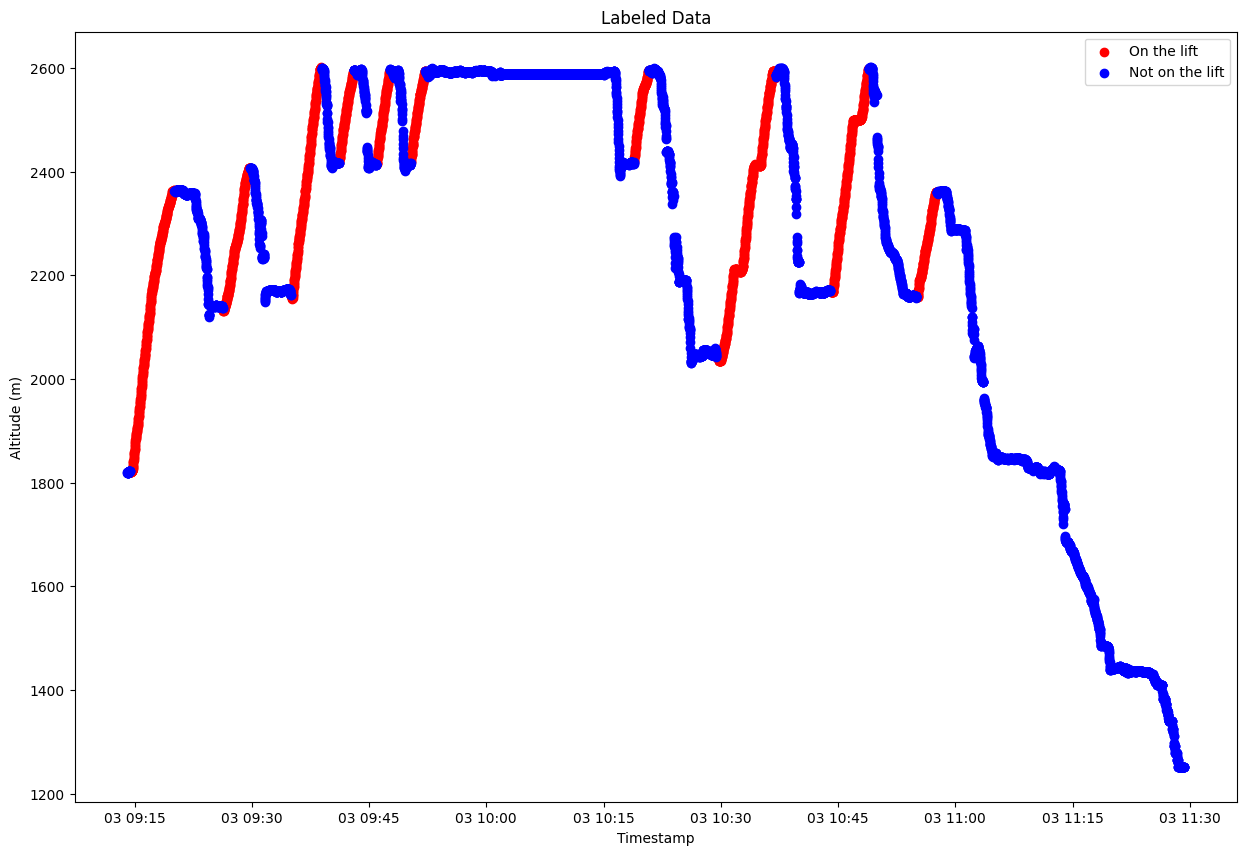

In [34]:
plot_manual_labeling(df_135_reduce_sampling_rate)

In [65]:
# # Call the function with your DataFrame
mymap = map_lift_rides(df_135_reduce_sampling_rate)
mymap

# Export

In [66]:
# export to CSV
name_of_csv='df_135_relabeled.csv'
df_135_reduce_sampling_rate.to_csv(name_of_csv, index=False)